# DALL-E

In [1]:
import os
from tqdm import tqdm
from IPython.display import display, clear_output
from abcli import file
from abcli.modules.cookie import cookie
from abcli.modules import objects
from openai_cli import NAME, VERSION
from openai_cli.DALLE.canvas import Canvas
from openai_cli.DALLE.brush import RandomWalkBrush, TilingBrush

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

Found credentials in shared credentials file: ~/.aws/credentials
using openai_cli-2.33.1.


In [2]:
os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
_, content = file.load_text(objects.path_of("private.txt"))
content = [line for line in content if line][:10]
logger.info(f"loaded {len(content)} line(s) of text.")

loaded 10 line(s) of text.


In [4]:
canvas = Canvas(demo_mode=True)

In [5]:
#brush = RandomWalkBrush(canvas)
brush = TilingBrush(canvas)

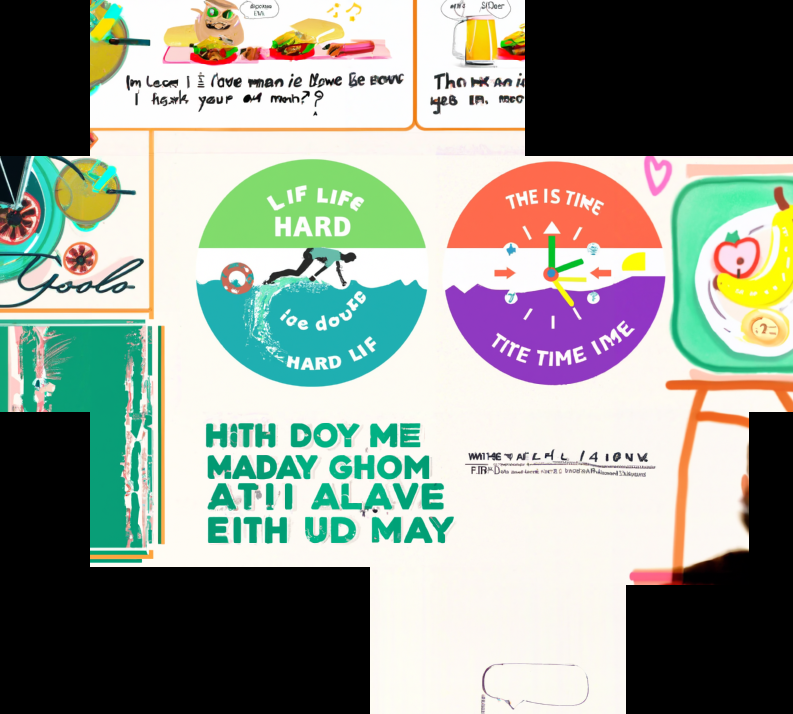

TilingBrush: ring:2 @ 86.87 deg
100%|██████████████████████████████████████████████████████████████████████| 10/10 [01:39<00:00,  9.90s/it]


In [6]:
for index in tqdm(range(len(content))):
    canvas.generate(brush, content[index])
    brush.move(canvas)

In [7]:
canvas.save(objects.path_of("private.png"))

---

In [8]:
# END